<a href="https://colab.research.google.com/github/ashfaquesayyed/Netflix-movies-and-TV-shows-clustering/blob/main/Netflix_movies_and_TV_shows_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features


# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [76]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots
from matplotlib.pyplot import figure
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

In [77]:
#importing file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#reading csv file
df=pd.read_csv('/content/drive/MyDrive/data folder/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
#checking dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#checking tail of dataset
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#shape of datset
df.shape

(7787, 12)

In [7]:
#checking statistical description
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data contains most of the categorical values.

In [8]:
#details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
#checking count of unique values in dataset
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [10]:
#checking duplicate values
df[df.duplicated()].count()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

No duplicate values are found in dataset

##Handling null values

In [11]:
#handling NAN values
df['director'].fillna('No director',inplace=True)
df['cast'].fillna('No cast',inplace=True)
df['country'].fillna('No country',inplace=True)


In place of NAN values we have fill NO director, no cast,No country.

In [12]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'], inplace=True)

In [13]:
# dropping the rows which are having null values
df.dropna(how='all',inplace=True)

In [14]:
# checking null values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
#percentage of null values
a=df.isnull().sum()/len(df)*100
b=a.sort_values(ascending=False)
b

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

##Univariate analysis

In [16]:
#checking how many Tv shows and movies are there
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

Text(0.5, 1.0, 'percentage of Tv shows and movies')

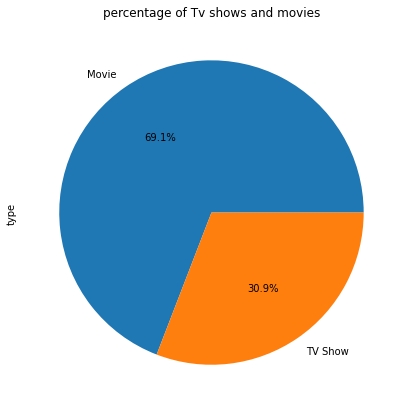

In [17]:
# Pie chart for type of shows
plt.figure(figsize=(7,7))
df['type'].value_counts().plot(kind='pie',autopct ='%0.1f%%')
plt.title('percentage of Tv shows and movies')

In our dataset we have around 69% content as movies and remaining 31% as TV shows. Netflix is releasing more movies than TV shows.

##Movies added to netflix each year

In [18]:
# Creating 'year' column
df['added_year'] =pd.to_datetime (df['date_added']).dt.year

In [19]:
# month
df['added_month'] =pd.to_datetime (df['date_added']).dt.month

In [20]:
# day
df['added_day'] = pd.to_datetime (df['date_added']).dt.day

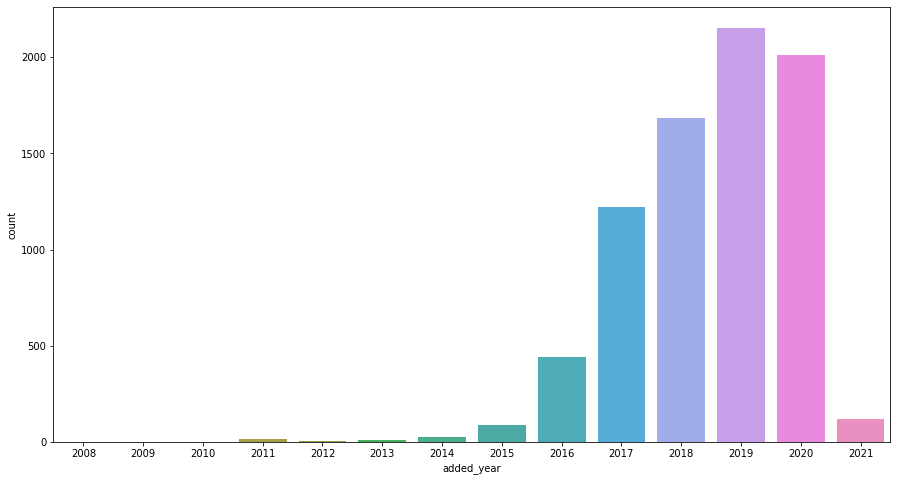

In [21]:
#plotting barplot for each year
plt.figure(figsize = (15,8))
sns.countplot(x='added_year',data=df)


The number of shows and movies added are maximum for year 2019 and 2020, number of shows decreased for year 2021.

##Content addition

In [22]:
# counting no. of contents added every month
df.added_month.value_counts()

12    832
10    785
1     756
11    738
3     668
9     618
8     617
7     600
4     600
5     543
6     542
2     471
Name: added_month, dtype: int64

Text(0.5, 1.0, 'Monthwise content addition')

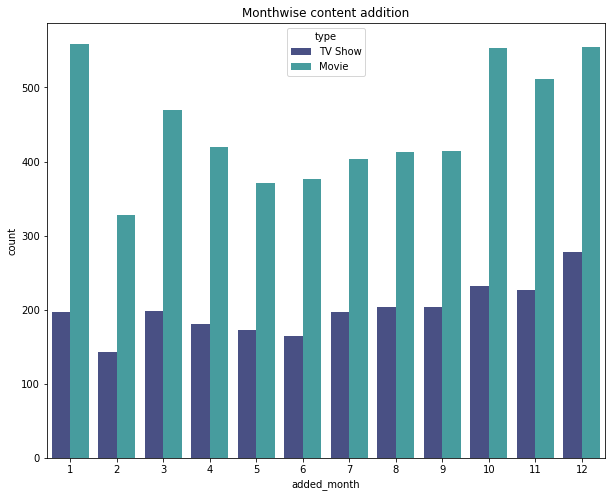

In [23]:
# Plotting a countplot for getting better insights from monthwise addition
plt.figure(figsize=(10,8))
sns.countplot(x='added_month',hue='type',data=df,palette = 'mako')
plt.title("Monthwise content addition")

we can clearly see that on **"January"**, **"October"** and in **"December"** there is more content added on netflix.

And in **"February"** very less amount of content added.

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day
0,s1,TV Show,3%,No director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


## **Ratings**

### **Netflix Rating of Movies/TV Shows based on content:-**

**TV-MA** :for Mature Audiences

**R** : Restricted

**PG-13** : Parents strongly cautioned. May be Inappropriate for ages 12 and under

**TV-14** : Parents strongly cautioned. May not be suitable for ages 14 and under

**TV-PG** : Parental Guidance suggested

**NR** : Not Rated

**TV-G** : Suitable for General Audiences

**TV-Y** : Designed to be appropriate for all children

**PG** : Parental Guidance suggested

**G** : Suitable for General Audiences

**NC-17** : the content isn't suitable for children under 17 and younger

**TV-Y7-FV** : Suitable for ages 7 and up

**UR** : Unrated

In [25]:
#counting all types of ratings
df.rating.value_counts().reset_index().rename(columns={'index':'Rating','rating':'Count'})

,Rating,Count
0,TV-MA,2861
1,TV-14,1928
2,TV-PG,804
3,R,665
4,PG-13,386
5,TV-Y,279
6,TV-Y7,270
7,PG,247
8,TV-G,194
9,NR,83


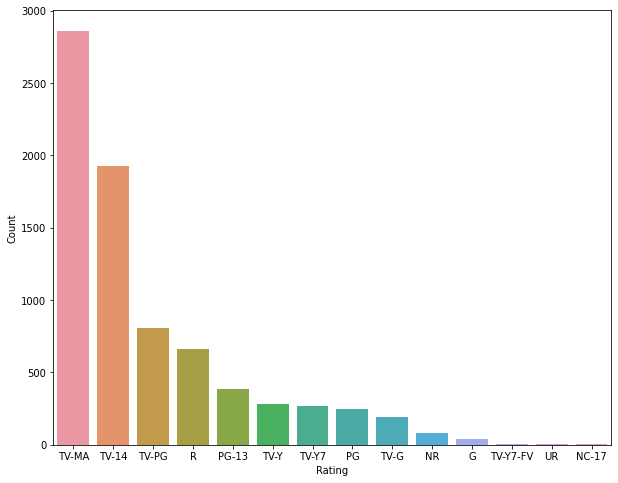

In [26]:
#ploting all types of ratings
plt.figure(figsize=(10,8))
new=df.rating.value_counts().reset_index().rename(columns={'index':'Rating','rating':'Count'})
sns.barplot(data=new,x='Rating',y='Count')

Netflix is adding most contents in TV-MA rating followed by TV-14 and TV-PG rating.Netflix is providing more content for matured audience(TV-MA).

##Top 15 Genres in Netflix

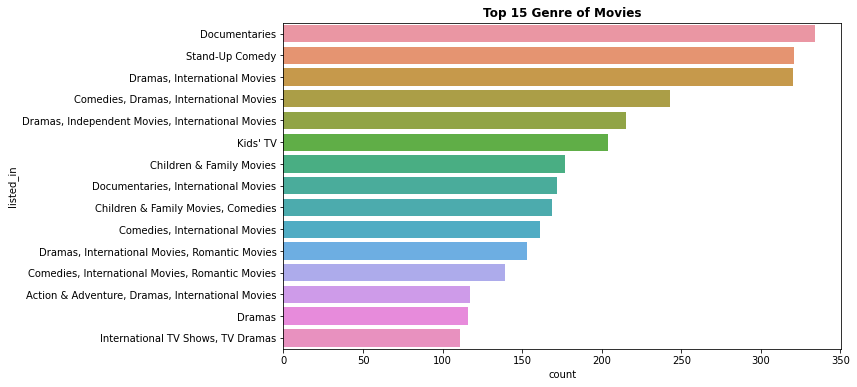

In [27]:

# Analysing top 15 genre of the movies
plt.figure(figsize=(10,6))
plt.title('Top 15 Genre of Movies',fontweight="bold")
sns.countplot(y=df['listed_in'],data=df,order=df['listed_in'].value_counts().index[0:15])



*   Documentaries, stand-up comedy, Dramas and international movies are the top 
most genres in Netflix. 
*  International TV shows, tv shows are rarest genre in Netflix.






##Duration

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


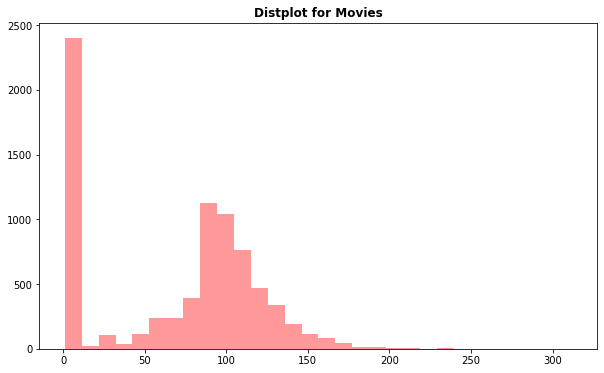

In [28]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,6))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(df['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot for Movies',fontweight="bold")
plt.show()

Most of the movies have duration of between 50 to 130.



##Country

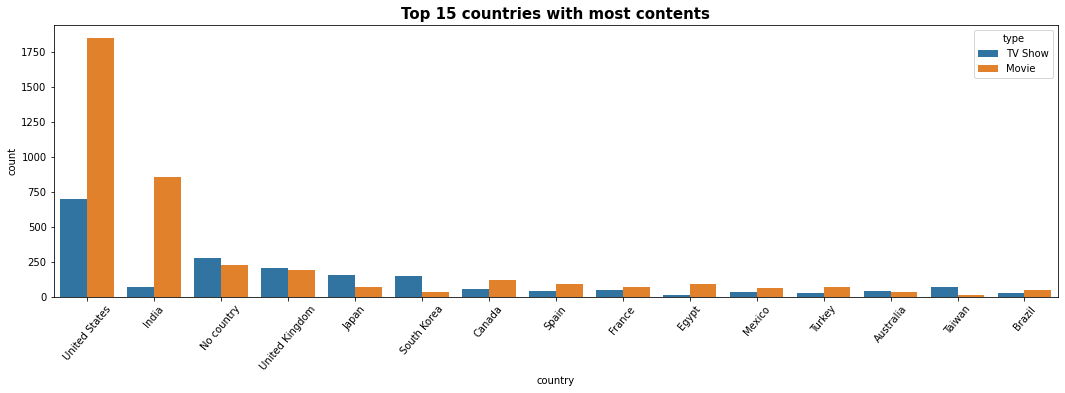

In [29]:
#Analysing top 15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

United states has the highest number of content on the netflix, followed by India.

##Title

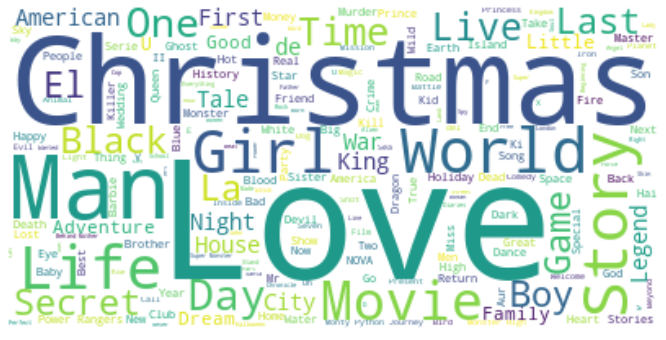

In [30]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(18,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems like worsd like 'world', 'life', 'man','Love','girl', and 'christmas' are very common in titles.

##Description

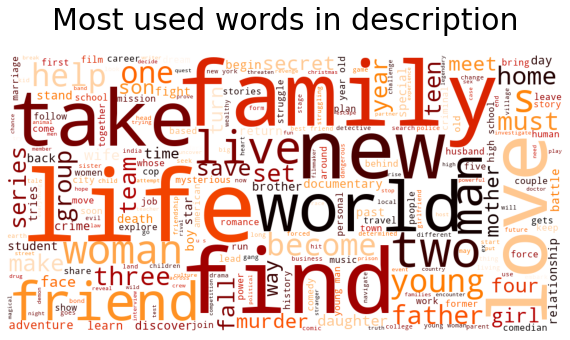

In [31]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in df.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Most occurring words in the description of the tv shows and movies are Family,life, friend,new,'take' and 'world'.

##Heatmap


In [35]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [36]:
df['target_ages'] = df['rating'].replace(ratings)


In [37]:

# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:12]
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,No country,South Korea,Spain,Turkey,United Kingdom,United States
target_ages,,,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.318812,0.469945,0.835821,0.53,0.512626,0.502357
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.170297,0.027322,0.022388,0.01,0.093434,0.073449
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.235644,0.120219,0.044776,0.10,0.204545,0.187353
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.275248,0.382514,0.097015,0.36,0.189394,0.236842


In [38]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,target_ages,count
0,s1,TV Show,3%,No director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,Teens,1


# **2. Understanding what type content is available in different countries**

### **Exploring Countries**

In [39]:
# Creating a different country dataframe
country_count = df.copy()
country_count = pd.concat([country_count , df['country'].str.split(",",expand=True)],axis=1)

**splitting country columns as single observation contains multiple country names**

In [40]:
# stripping of the country column
country_count["country"] = country_count["country"].str.strip()

In [41]:
top_20_countries= country_count["country"].value_counts()[:20].reset_index().rename(columns={'index':'country','country':'count'})


**counting occurences of countries**

In [42]:
# counting occurences of countries by using value_counts
df['country'].value_counts()[:20]



United States                    2546
India                             923
No country                        505
United Kingdom                    396
Japan                             224
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Mexico                            100
Turkey                            100
Australia                          81
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
Name: country, dtype: int64

<Figure size 864x3600 with 0 Axes>

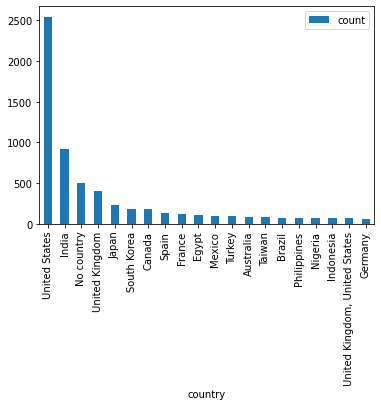

In [43]:
plt.figure( figsize = ( 12,50 ))
top_20_countries.plot(x="country", y="count", kind="bar")

### **Ratings VS Countries**

In [44]:
# defining a function
def barplot_rating(country_name):
  '''
  it will take a country name and return the rating count
  '''
  plt.figure(figsize=(8,6))
  from seaborn.categorical import countplot
  sns.set_theme(style="darkgrid")
  ax = sns.countplot(x='rating',data=country_count[country_count['country']==country_name])
  ax.set_title(country_name)

**Plotting the countplot for raings in top 20 countries**:

In [45]:
# Converting country names to list using tolist
list_top20_countries = top_20_countries['country'].tolist()

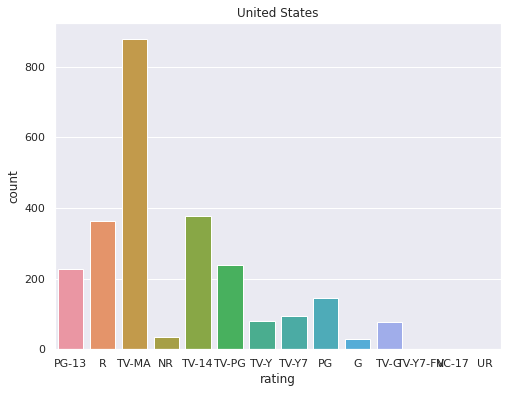

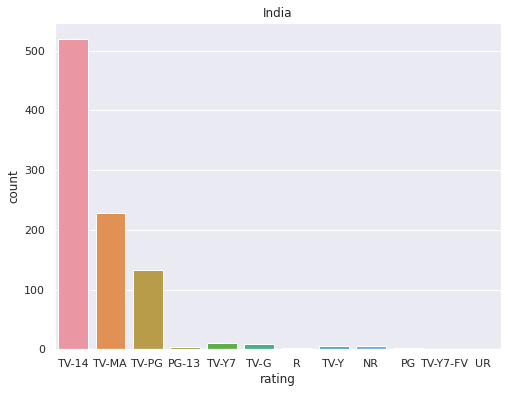

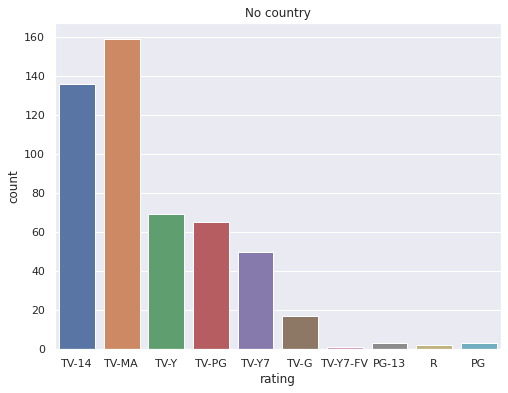

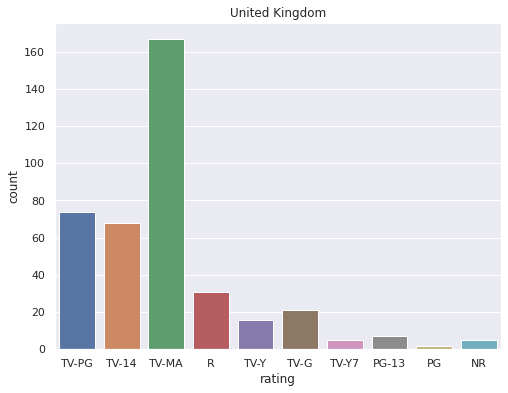

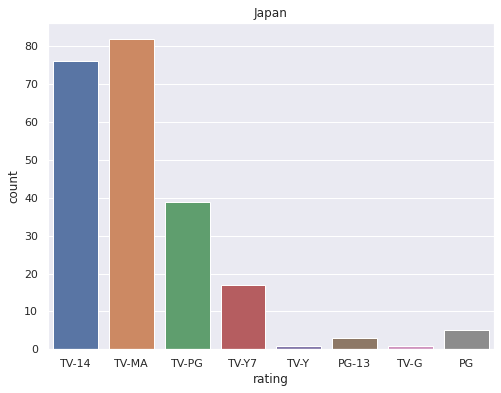

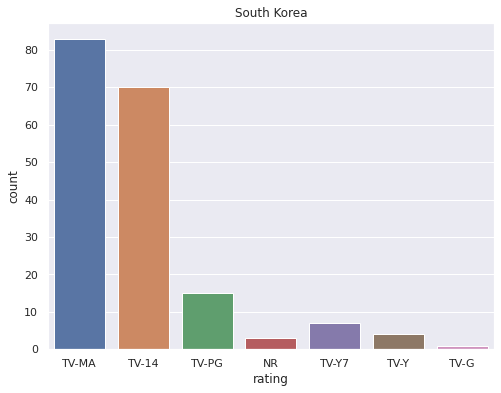

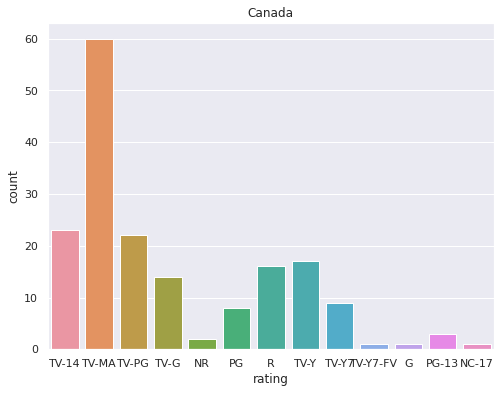

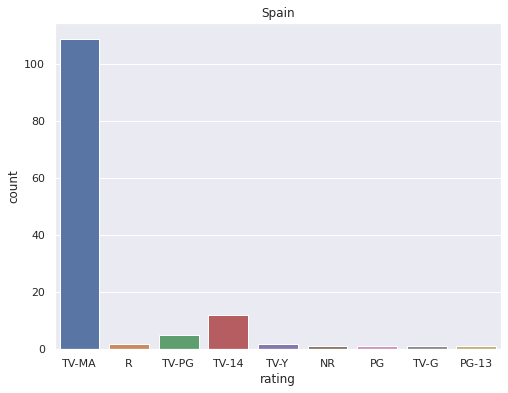

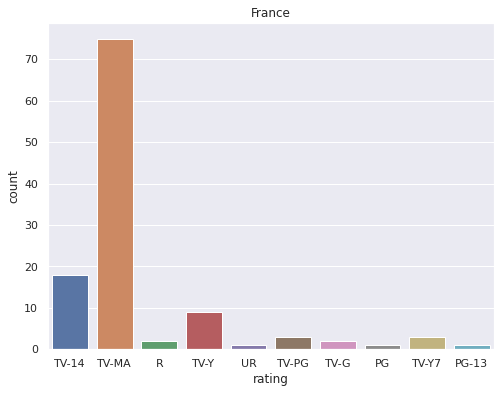

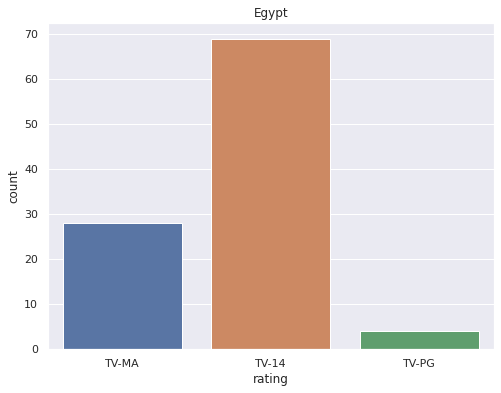

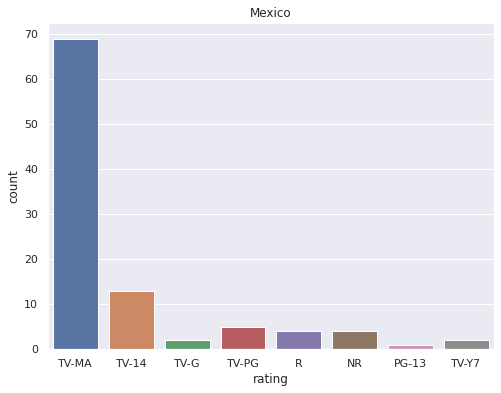

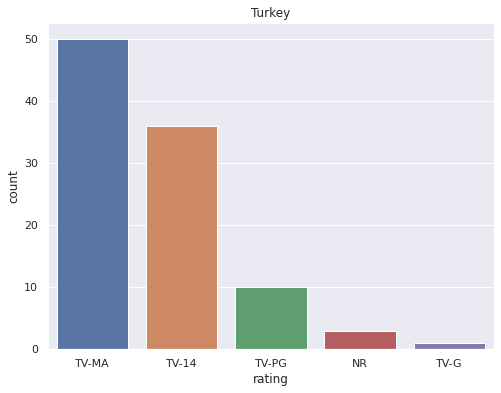

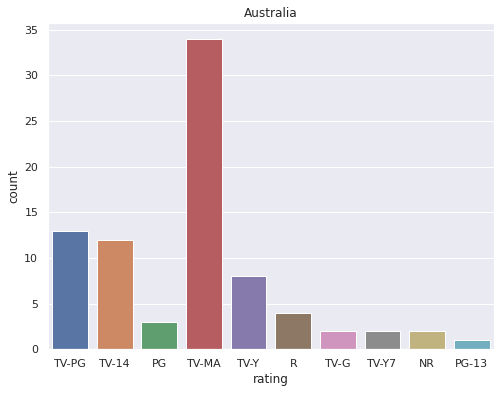

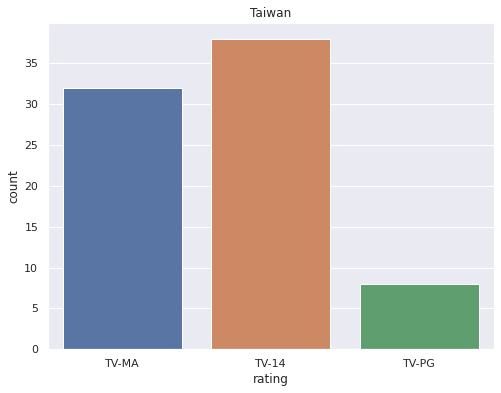

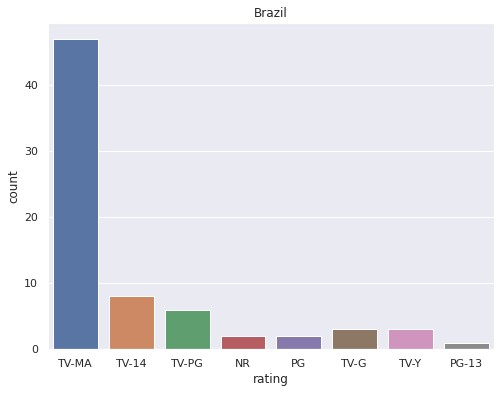

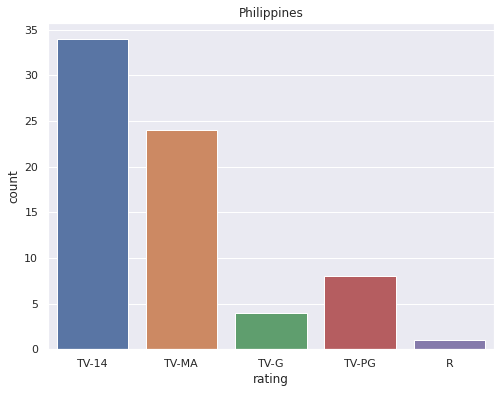

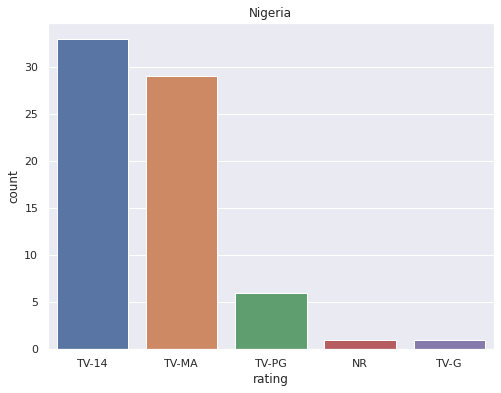

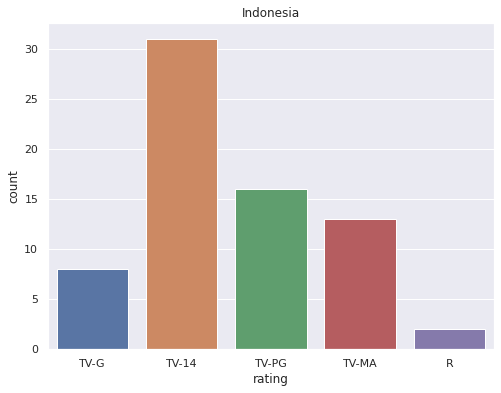

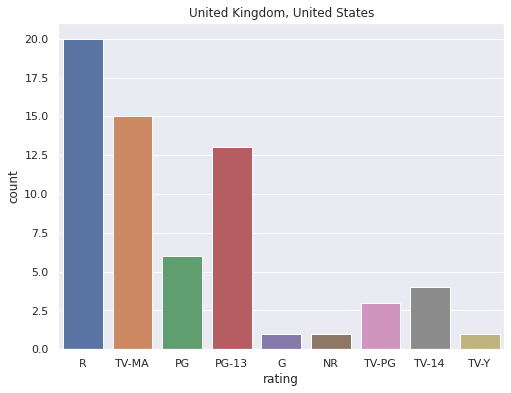

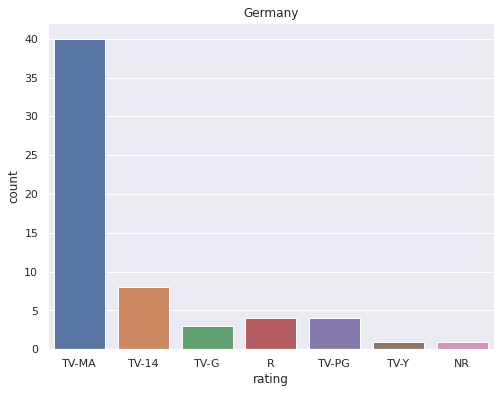

In [46]:
# Getting the country names one by one
for country_name in list_top20_countries:
  barplot_rating(country_name)

Here we can say that shows with **TV-MA** rating are highest in **Belgium, Brazil, Italy, Turkey, Australia, Mexico, Germany, South korea, Spain, Japan, France, Canada, United Kingdom, United States**

**India, China, Egypt, Hongkong and Taiwan** has higest number shows rated as **TV-14**

## **3.Is Netflix has increasingly focusing on TV rather than movies in recent years ??**

Text(0.5, 1.0, "Recent year Netflix's Uploads")

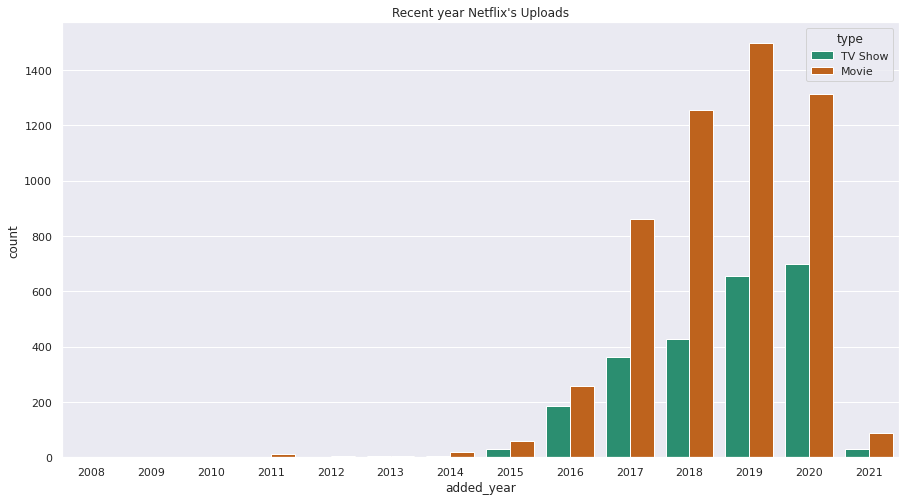

In [48]:
# Plotting a countplot
plt.figure(figsize=(15,8))
sns.countplot(x='added_year',hue='type',data=df,palette = "Dark2")
plt.title("Recent year Netflix's Uploads")

From above countplot we can clealry see that from 2017 number of Movies added increased tremendously, but at the same time TV shows added from 2017 are also increased but as comparison to Movies they are very less in numbers.

## **4. Clustering similar content by matching text-based features**

In [52]:
# We will add all categorical and text based columns
df['text_info'] = df['description'] + ' '+ df['listed_in'] + ' ' + df['rating'] + ' '+ df['country']+ ' ' + df['title'] + ' '+ df['director'] + ' ' + df['cast']

In [53]:
# Checking 
df['text_info'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. International TV Shows, TV Dramas, TV Sci-Fi & Fantasy TV-MA Brazil 3% No director João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

##Text cleaning

In [54]:
#text cleaning function
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [57]:
# Applying above function on our combined column
df['text_info'] = df['text_info'].apply(clean_text)

In [59]:
# we will convert all words in lowercase
df['text_info'] = df['text_info'].str.lower()

In [60]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##Stemming

In [61]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [62]:
# defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered

df['cleaned_text']= ''
for item, row in df.iterrows():
  df.at[item,'cleaned_text'] = filter_words(row['text_info'],stop_words)

df['cleaned_text']

0       [futur, elit, inhabit, island, paradis, far, c...
1       [devast, earthquak, hit, mexico, citi, trap, s...
2       [armi, recruit, found, dead, fellow, soldier, ...
3       [postapocalypt, world, ragdol, robot, hide, fe...
4       [brilliant, group, student, becom, cardcount, ...
                              ...                        
7782    [lebanon, civil, war, depriv, zozo, famili, he...
7783    [scrappi, poor, boy, worm, way, tycoon, dysfun...
7784    [documentari, south, african, rapper, nasti, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentari, delv, mystiqu, behind, bluesrock...
Name: cleaned_text, Length: 7770, dtype: object

In [63]:
#join words fun
def join_words(x):
  return " ".join(x)

In [65]:
#final column
df['cleaned_text'] = df['cleaned_text'].apply(join_words)

In [66]:
#cleaned 
words = df.cleaned_text

## **TF-IDF**

**Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector.** 

**TF** - The term frequency is the number of occurrences of a specific term in a document. Term frequency indicates how important a specific term in a document. Term frequency represents every text from the data as a matrix whose rows are the number of documents and columns are the number of distinct terms throughout all documents.

**IDF** - Document frequency is the number of documents containing a specific term. Document frequency indicates how common the term is.Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term’s occurrences are scattered throughout all the documents.


In [79]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X= t_vectorizer.fit_transform(words)

In [68]:
X

<7770x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 258207 stored elements in Compressed Sparse Row format>

### **Applying PCA-Principal Component Analysis to reduce dimensions.**

**PCA- Pricipal Component Analysis**

Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.

It is a technique to draw strong patterns from the given dataset by reducing the variances.

PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

In [70]:
#PCA Code
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
transformer = PCA()
transformer.fit(X.toarray())

PCA()

### **Cumulative Explained Variance**

Text(0, 0.5, 'cumulative explained variance')

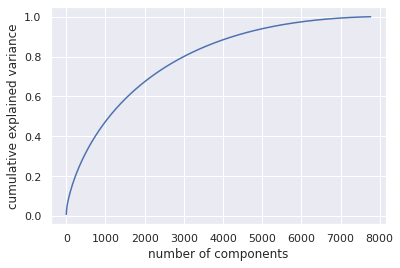

In [71]:
 #explained var v/s comp
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


**here we can clearly spot that 80% variance is explained by 3000 components only.**

We will use 3000 components 

In [72]:
#choosing right dim from plot, this might take a while, for ready ans use n_components = 3000
from sklearn.decomposition import PCA
transformer = PCA(n_components=3000)
transformer.fit(X.toarray())
X_transformed = transformer.transform(X.toarray())
X_transformed.shape

(7770, 3000)

In [81]:
# vectorizing the test and train
X_vectorized = t_vectorizer.transform(words)

In [82]:
#applying pca
X= transformer.transform(X_vectorized.toarray())

In [83]:
X

array([[ 0.10646418, -0.01928582, -0.01740729, ..., -0.03143068,
        -0.01534104, -0.0205919 ],
       [-0.04189165, -0.03772177,  0.01283077, ..., -0.0055028 ,
        -0.00464938,  0.00054833],
       [-0.04737489, -0.04260354, -0.03223051, ..., -0.00196252,
        -0.00724625, -0.00601501],
       ...,
       [-0.04381807,  0.04665963,  0.22140172, ..., -0.01273865,
         0.01072312, -0.00192135],
       [ 0.07111786,  0.01020868,  0.01151884, ..., -0.00253237,
         0.00058607, -0.01935537],
       [-0.08713666,  0.19968472,  0.24886884, ..., -0.01062391,
         0.01683438, -0.00136381]])

# **KMeans Clustering**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

##**Silhouette Score Elbow for KMeans Clustering**

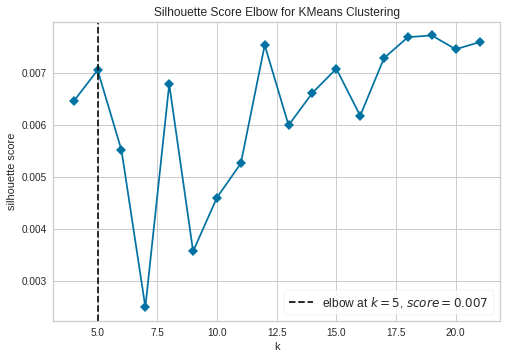

In [84]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

### **Elbow Method to get number of clusters**